In [496]:
#importación de librerias

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.datasets import make_classification

In [497]:
# Carga del dataset
df = pd.read_csv('weatherAUS.csv')

# Ver primeras filas
print(df.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0      

In [498]:
print("Ubicaciones únicas:", sorted(df['Location'].unique()))
print("Cantidad de ubicaciones únicas:", df['Location'].nunique())

Ubicaciones únicas: ['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']
Cantidad de ubicaciones únicas: 49


In [499]:
print(df['Location'].value_counts())

Location
Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Albury              3040
MountGinini         3040
GoldCoast           3040
Wollongong          3040
MountGambier        3040
Launceston          3040
AliceSprings        3040
Albany              3040
Townsville          3040
Bendigo             3040
Cairns              3040
Ballarat            3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
PerthAirport        3009
Williamtown         3009
Cobar               3009
BadgerysCreek       3009
SydneyAirport       3009
Richmond            3009
Moree               3009
CoffsHarbour        3009
NorfolkIsland       3009
WaggaWagga          3009
Witchcliffe         3009
Watsonia            3009
Dartmoor            3009
Portland            3009
Sale                3009
MelbourneAirport    3009
Mildura         

In [500]:
# Dimensiones
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Información general y resumen estadístico
df.info()
print(df.describe(include='all'))

Filas: 145460, Columnas: 23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  C

In [501]:
# Valores nulos por columna
print(df.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [502]:
# Se lee dataset con coordenadas y se mergea para asociar cada ciudad a su lat y long
df_coords = pd.read_csv('weatherAUS-geo-coordinates.csv')  # Asegúrate del nombre correcto del archivo

df = df.merge(df_coords, left_on='Location', right_on='city', how='left')
df = df.drop(columns=['city'])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,latitude,longitude
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,-36.080780,146.916473
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,-36.080780,146.916473
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,-36.080780,146.916473
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,-36.080780,146.916473
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,-36.080780,146.916473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,-24.485318,130.928669
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,-24.485318,130.928669
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,-24.485318,130.928669
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,-24.485318,130.928669


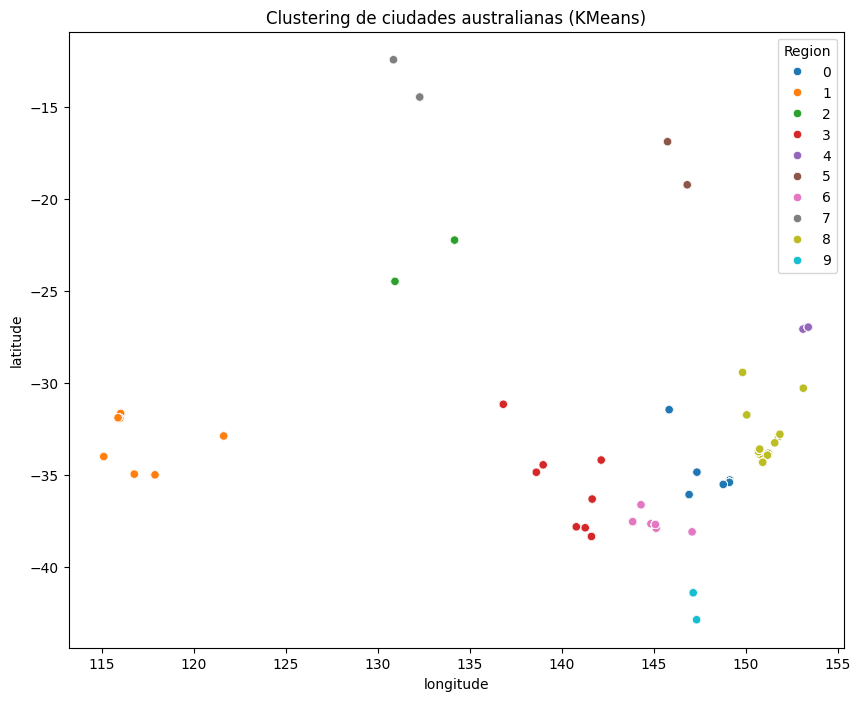

In [503]:
from sklearn.cluster import KMeans

X = df[['latitude', 'longitude']]
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Region'] = kmeans.fit_predict(X)

plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude', hue='Region', data=df, palette='tab10')
plt.title('Clustering de ciudades australianas (KMeans)')
plt.show()

In [504]:
# Para poder imputar mejor los nan, creamos la variable Season ya que las variables meteorológicas tienen patrones estacionales
df['Date'] = pd.to_datetime(df['Date'])

def get_season(dt):
    month = dt.month
    # Estaciones para el hemisferio sur
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'

df['Season'] = df['Date'].apply(get_season)

In [505]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)


In [506]:
# Lista de variables a contar nulos
variables_numericas = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
]

# Contar nulos en cada variable
nulos_train = df_train[variables_numericas].isnull().sum()
nulos_test = df_train[variables_numericas].isnull().sum()
print("Nulos en df_train antes de la imputación:")
print(nulos_train)
print()
print("Nulos en df_test antes de la imputación:")
print(nulos_test)

Nulos en df_train antes de la imputación:
MinTemp           1178
MaxTemp            998
Rainfall          2604
Evaporation      50329
Sunshine         55942
WindGustSpeed     8202
WindSpeed9am      1408
WindSpeed3pm      2457
Humidity9am       2117
Humidity3pm       3616
Pressure9am      12061
Pressure3pm      12042
Cloud9am         44757
Cloud3pm         47548
Temp9am           1405
Temp3pm           2897
dtype: int64

Nulos en df_test antes de la imputación:
MinTemp           1178
MaxTemp            998
Rainfall          2604
Evaporation      50329
Sunshine         55942
WindGustSpeed     8202
WindSpeed9am      1408
WindSpeed3pm      2457
Humidity9am       2117
Humidity3pm       3616
Pressure9am      12061
Pressure3pm      12042
Cloud9am         44757
Cloud3pm         47548
Temp9am           1405
Temp3pm           2897
dtype: int64


In [507]:
# Imputacion de nan en variables numéricas por la mediana del mismo día y región
# Utilizamos la mediana ya que los datos meteorológicos suelen presentar distribuciones asimétricas y eventos extremos que afectan la media
for var in variables_numericas:
    grouped_median = df_train.groupby(['Region', 'Date'])[var].transform('median')
    df_train.loc[df_train[var].isnull(), var] = grouped_median[df_train[var].isnull()]

In [508]:
# Contar nulos en cada variable
nulos_train = df_train[variables_numericas].isnull().sum()
nulos_test = df_test[variables_numericas].isnull().sum()
print("Nulos en df_train después de la primera imputación:")
print(nulos_train)
print()
print("Nulos en df_test después de la primera imputación:")
print(nulos_test)

Nulos en df_train después de la primera imputación:
MinTemp            14
MaxTemp            12
Rainfall           55
Evaporation      2924
Sunshine         6676
WindGustSpeed     364
WindSpeed9am       21
WindSpeed3pm        9
Humidity9am        25
Humidity3pm       140
Pressure9am       186
Pressure3pm       185
Cloud9am         4187
Cloud3pm         4449
Temp9am            12
Temp3pm           115
dtype: int64

Nulos en df_test después de la primera imputación:
MinTemp            307
MaxTemp            263
Rainfall           657
Evaporation      12461
Sunshine         13893
WindGustSpeed     2061
WindSpeed9am       359
WindSpeed3pm       605
Humidity9am        537
Humidity3pm        891
Pressure9am       3004
Pressure3pm       2986
Cloud9am         11131
Cloud3pm         11810
Temp9am            362
Temp3pm            712
dtype: int64


In [509]:
# Imputación por mediana de Región segun la season para los nan que sigue habiendo
for var in variables_numericas:
    grouped_region_season_median = df_train.groupby(['Region', 'Season'])[var].transform('median')
    df_train.loc[df_train[var].isnull(), var] = grouped_region_season_median[df_train[var].isnull()]

In [510]:
# Contar nulos en cada variable
nulos_train = df_train[variables_numericas].isnull().sum()
nulos_test = df_test[variables_numericas].isnull().sum()
print("Nulos en df_train después de la segunda imputación:")
print(nulos_train)
print()
print("Nulos en df_test después de la segunda imputación:")
print(nulos_test)


Nulos en df_train después de la segunda imputación:
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Nulos en df_test después de la segunda imputación:
MinTemp            307
MaxTemp            263
Rainfall           657
Evaporation      12461
Sunshine         13893
WindGustSpeed     2061
WindSpeed9am       359
WindSpeed3pm       605
Humidity9am        537
Humidity3pm        891
Pressure9am       3004
Pressure3pm       2986
Cloud9am         11131
Cloud3pm         11810
Temp9am            362
Temp3pm            712
dtype: int64


In [511]:
# Lista de variables categoricas a contar nulos
variables_categoricas = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# Contar nulos en cada variable
nulos_train = df_train[variables_categoricas].isnull().sum()
nulos_test = df_test[variables_categoricas].isnull().sum()
print("Nulos en df_train")
print(nulos_train)
print()
print("Nulos en df_test")
print(nulos_test)

Nulos en df_train
WindGustDir    8250
WindDir9am     8429
WindDir3pm     3397
RainToday      2604
dtype: int64

Nulos en df_test
WindGustDir    2076
WindDir9am     2137
WindDir3pm      831
RainToday       657
dtype: int64


In [512]:
# Imputacion de nan de variables categoricas por la Moda (ya que nos parece mas adecuado para las cat) del mismo día y región
for var in variables_categoricas:
    grouped_mode = df_train.groupby(['Region', 'Date'])[var].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    df_train.loc[df_train[var].isnull(), var] = grouped_mode[df_train[var].isnull()]


In [513]:
# Contar nulos en cada variable
nulos_train = df_train[variables_categoricas].isnull().sum()
nulos_test = df_test[variables_categoricas].isnull().sum()
print("Nulos en df_train después de la primera imputación:")
print(nulos_train)
print()
print("Nulos en df_test después de la primera imputación:")
print(nulos_test)

Nulos en df_train después de la primera imputación:
WindGustDir    366
WindDir9am     335
WindDir3pm      38
RainToday       55
dtype: int64

Nulos en df_test después de la primera imputación:
WindGustDir    2076
WindDir9am     2137
WindDir3pm      831
RainToday       657
dtype: int64


In [514]:
# Se eliminan los restantes ya que consideramos que si aplicamos la misma logica que venimos teniendo, la moda alteraría de manera negativa el df
df_train = df_train.dropna(subset=variables_categoricas)

In [515]:
# Valores nulos por columna
print("Valores nulos en df_train")
print(df_train.isnull().sum())
print()
print("Valores nulos en df_test")
print(df_test.isnull().sum())

Valores nulos en df_train
Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     2570
latitude            0
longitude           0
Region              0
Season              0
dtype: int64

Valores nulos en df_test
Date                 0
Location             0
MinTemp            307
MaxTemp            263
Rainfall           657
Evaporation      12461
Sunshine         13893
WindGustDir       2076
WindGustSpeed     2061
WindDir9am        2137
WindDir3pm         831
WindSpeed9am       359
WindSpeed3pm       605
Humidity9am        537
Humidity3pm        

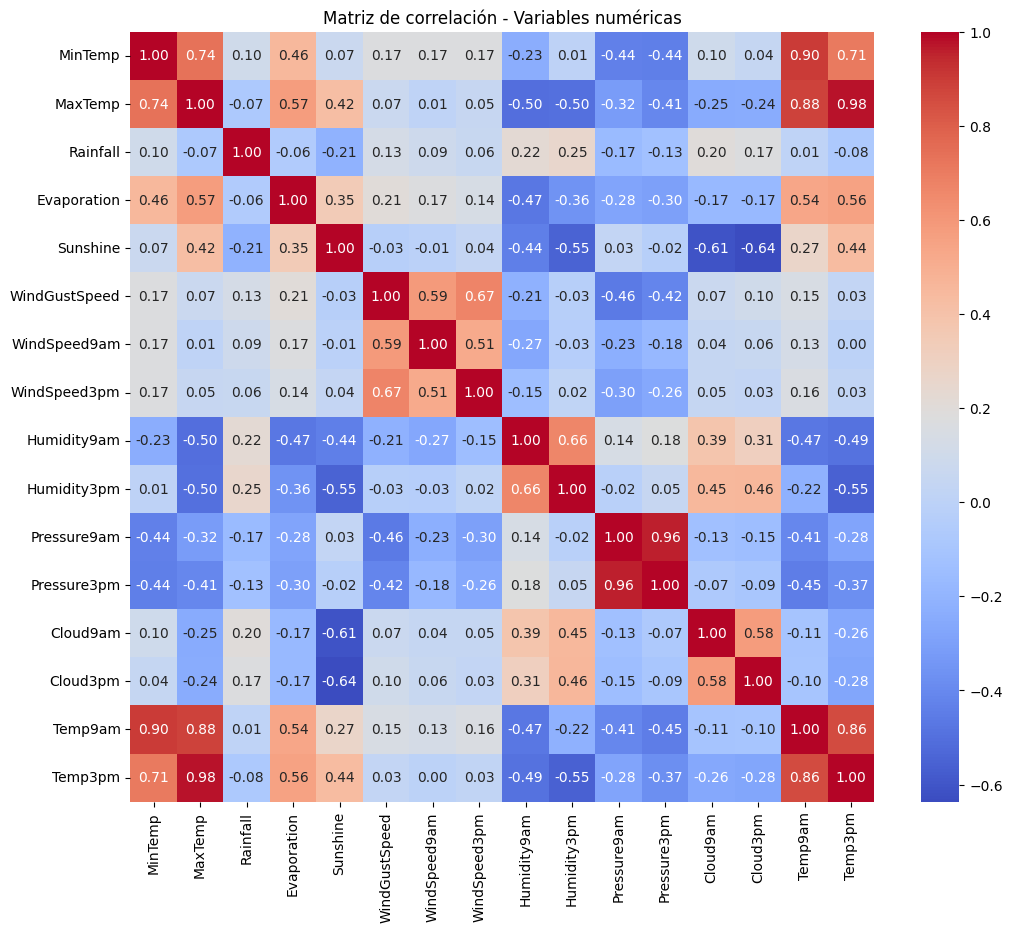

In [516]:
# Analizamos la matriz de correlación entre las variables numéricas
variables_numericas = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
]

corr_matrix = df_train[variables_numericas].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación - Variables numéricas')
plt.show()

In [517]:
# Crear variables dummies para la columna 'Region'
df_train = pd.get_dummies(df_train, columns=['Region'], prefix='Region')
df_test = pd.get_dummies(df_test, columns=['Region'], prefix='Region')

In [518]:
df_train.drop(columns=['Location','latitude', 'longitude','Date'], inplace=True)
df_test.drop(columns=['Location','latitude', 'longitude','Date'], inplace=True)

In [519]:
for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Season']:
    print(f"Valores únicos en {col}: {df_train[col].unique()}")

Valores únicos en WindGustDir: ['SSE' 'SE' 'W' 'N' 'ENE' 'NW' 'SSW' 'SW' 'ESE' 'S' 'NNW' 'NNE' 'E' 'WSW'
 'WNW' 'NE']
Valores únicos en WindDir9am: ['ENE' 'N' 'SW' 'WSW' 'SSW' 'ESE' 'NW' 'NNE' 'E' 'SSE' 'WNW' 'SE' 'W'
 'NNW' 'S' 'NE']
Valores únicos en WindDir3pm: ['S' 'NW' 'SSE' 'SSW' 'W' 'NNW' 'E' 'ESE' 'SW' 'ENE' 'NNE' 'N' 'WSW' 'NE'
 'WNW' 'SE']
Valores únicos en RainToday: ['Yes' 'No']
Valores únicos en Season: ['Autumn' 'Spring' 'Summer' 'Winter']


In [520]:
# Función para convertir direcciones de viento a ángulos en radianes
def wind_dir_to_rad(wind_dir):
    # Mapeo de direcciones a ángulos (grados)
    mapping = {
        'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
        'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
        'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
        'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
    }
    return wind_dir.map(mapping).astype(float) * np.pi / 180

for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    for df_ in [df_train, df_test]:
        rad = wind_dir_to_rad(df_[col])
        df_[f'{col}_sin'] = np.sin(rad)
        df_[f'{col}_cos'] = np.cos(rad)
    # Opcional: eliminar la columna original
    df_train.drop(columns=[col], inplace=True)
    df_test.drop(columns=[col], inplace=True)

In [521]:
# Creamos dummies para las variables categoricas indicadas
columnas_dummies = ['RainToday','RainTomorrow','Season']

df_train = pd.get_dummies(df_train, columns=columnas_dummies, prefix=columnas_dummies, drop_first=True)

df_train.rename(columns={
    'RainToday_Yes': 'RainToday',
    'RainTomorrow_Yes': 'RainTomorrow'
}, inplace=True)

df_test = pd.get_dummies(df_test, columns=columnas_dummies, prefix=columnas_dummies, drop_first=True)

df_test.rename(columns={
    'RainToday_Yes': 'RainToday',
    'RainTomorrow_Yes': 'RainTomorrow'
}, inplace=True)

In [523]:
# Para ver todas las columnas del DataFrame en la salida
pd.set_option('display.max_columns', None)
df_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Region_0,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos,RainToday,RainTomorrow,Season_Spring,Season_Summer,Season_Winter
111548,14.5,17.8,14.2,6.0,10.3,29.5,0.0,16.0,94.0,44.5,1024.1,1022.5,8.0,1.0,16.2,22.7,False,True,False,False,False,False,False,False,False,False,0.382683,-9.238795e-01,0.923880,0.382683,1.224647e-16,-1.000000,True,True,False,False,False
142528,24.6,39.5,0.0,12.0,10.8,31.0,9.0,17.0,52.0,21.0,1011.8,1006.6,2.0,4.0,30.1,39.2,False,False,False,False,False,False,False,True,False,False,0.707107,-7.071068e-01,0.000000,1.000000,-7.071068e-01,0.707107,False,False,True,False,False
65304,14.7,26.6,0.2,3.2,8.0,30.0,7.0,11.0,87.0,57.0,1018.2,1015.4,7.0,3.0,17.3,24.5,False,False,False,False,False,False,True,False,False,False,0.382683,-9.238795e-01,-0.707107,-0.707107,1.224647e-16,-1.000000,False,False,False,True,False
40651,18.3,26.6,0.0,6.4,8.5,28.0,11.0,22.0,79.0,67.0,1017.0,1016.5,6.0,6.0,23.0,25.4,False,False,False,False,False,False,False,False,True,False,0.707107,-7.071068e-01,-0.923880,-0.382683,3.826834e-01,-0.923880,False,False,False,True,False
97487,11.4,19.3,0.6,2.4,8.9,31.0,13.0,19.0,63.0,47.0,1018.6,1017.1,7.0,6.0,14.4,18.3,False,False,False,True,False,False,False,False,False,False,-1.000000,-1.836970e-16,-0.707107,-0.707107,-3.826834e-01,-0.923880,False,False,True,False,False


In [525]:
df_test.dropna(inplace=True)

In [526]:
X_train = df_train.drop(columns=['RainTomorrow'])
y_train = df_train['RainTomorrow']

X_test = df_test.drop(columns=['RainTomorrow'])
y_test = df_test['RainTomorrow']

In [527]:
# Escalado de variables
scaler = StandardScaler()
numerical_features = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
]
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.fit_transform(X_test[numerical_features])


In [529]:
# Entrenamiento del modelo de regresión logística y balanceado


modelo = LogisticRegression(class_weight='balanced', random_state=42)
modelo.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [530]:
# Metricas en el conjunto de entrenamiento
y_train_pred = modelo.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
confusion_train = confusion_matrix(y_train, y_train_pred)
recall_train = confusion_train[1,1] / (confusion_train[1,0] + confusion_train[1,1])
precision_train = confusion_train[1,1] / (confusion_train[0,1] + confusion_train[1,1])
f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
print(f"Accuracy en entrenamiento: {accuracy_train:.4f}")
print(f"Recall en entrenamiento: {recall_train:.4f}")
print(f"Precision en entrenamiento: {precision_train:.4f}")
print(f"F1-Score en entrenamiento: {f1_train:.4f}")

print()
# Metricas en el conjunto de prueba
y_test_pred = modelo.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)
recall_test = confusion_test[1,1] / (confusion_test[1,0] + confusion_test[1,1])
precision_test = confusion_test[1,1] / (confusion_test[0,1] + confusion_test[1,1])
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print(f"Accuracy en prueba: {accuracy_test:.4f}")
print(f"Recall en prueba: {recall_test:.4f}")
print(f"Precision en prueba: {precision_test:.4f}")
print(f"F1-Score en prueba: {f1_test:.4f}")


Accuracy en entrenamiento: 0.7959
Recall en entrenamiento: 0.7837
Precision en entrenamiento: 0.5224
F1-Score en entrenamiento: 0.6269

Accuracy en prueba: 0.8149
Recall en prueba: 0.8010
Precision en prueba: 0.5585
F1-Score en prueba: 0.6581


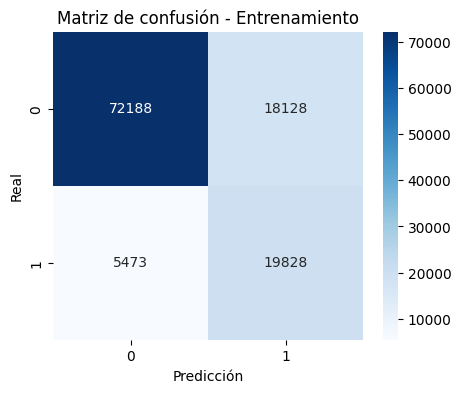

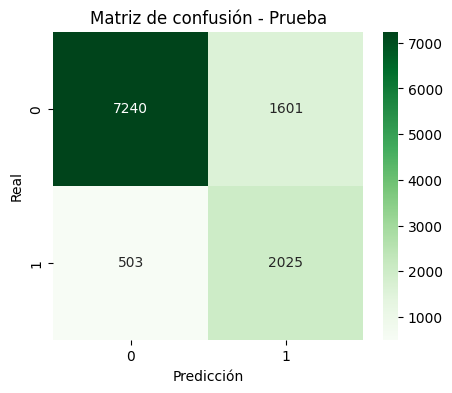

In [531]:
# Graficar matriz de confusión de entrenamiento
plt.figure(figsize=(5,4))
sns.heatmap(confusion_train, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión - Entrenamiento")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Graficar matriz de confusión de prueba
plt.figure(figsize=(5,4))
sns.heatmap(confusion_test, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de confusión - Prueba")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

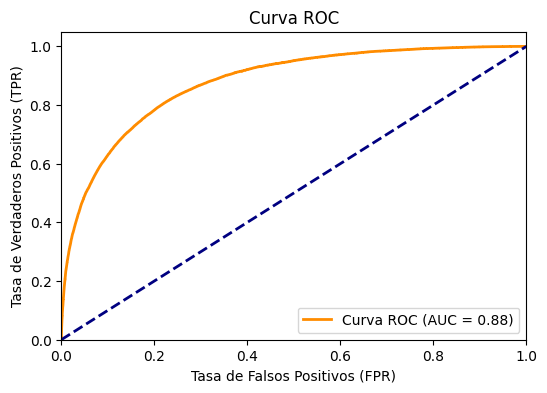

In [532]:
# Obtengo las probabilidades de predicción del modelo
y_probs = modelo.predict_proba(X_train)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_train, y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

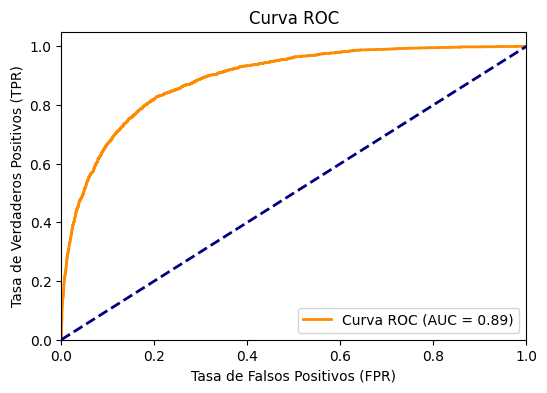

In [533]:
# Obtengo las probabilidades de predicción del modelo
y_probs = modelo.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()